In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize as opt
from datetime import datetime

In [2]:
from flowstock import Akagi
from flowstock.data import load_csv
from flowstock.data import distances

In [3]:
import pandas as pd

Load data

In [4]:
centroid_data_fname = "/Users/easther/unixland/thinking/covid_models/data/area/statistical-area-2-2018-centroid-true.csv"

In [5]:
telco_data_fname = "/Users/easther/unixland/thinking/covid_models/data/telco/pop_data_2020-04-01.dat"

In [6]:
center = "Christchurch Central"

In [7]:
date_first = datetime(2020, 2, 18, 8)
date_last = datetime(2020, 2, 18, 9)

In [8]:
D = 15000 # meters but K is in km to avoid numerical issues

In [9]:
centroid_data = load_csv.load_centroid_data_2018(centroid_data_fname)
centroid_data_shrunk = distances.remove_furthest_points(centroid_data, D, center)
distance_table = distances.calculate_distances(centroid_data_shrunk)
d = (distance_table.to_numpy()[:, 2:] / 1000).astype(float)

region_codes = distance_table['region_code']

telco = load_csv.load_telco_data(telco_data_fname)

telco_subset = pd.pivot_table(
    telco[
        (telco["region_code"].isin(region_codes)) &
        ((telco["time"] == date_first) |
        (telco["time"] == date_last))
    ],
    index="time",
    columns="region_code",
    values="count",
)

N = telco_subset.to_numpy()*1000

In [10]:
d.shape

(167, 167)

In [11]:
N.shape

(2, 167)

In [12]:
N.dtype

dtype('int64')

In [13]:
K = 80

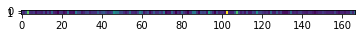

In [14]:
plt.imshow(N)

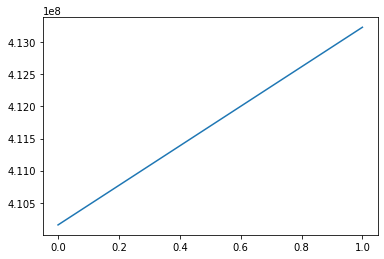

In [15]:
plt.plot(N.sum(axis=1))

# Estimate movement

In [16]:
a = Akagi(N, d, K)

In [17]:
a.lamda = 1e-3

In [18]:
%time result = a.exact_inference(1e-4,True)

/anaconda3/envs/covid/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


L  -11516978500.0 -17200931235.105717
step #  0 , L =  -17200931235.105717
beta  0.1
pi  [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
L  -11516978500.0 -17200931235.105717
L  -8473499778.938085 -14

L  -29141241.744503103 -5711316285.55523
L  -29141241.684277583 -5711316285.553374
L  -29141241.674519982 -5711316285.553126
L  -29141241.672906354 -5711316285.553093
L  -29141241.672635652 -5711316285.55309
L  -29141241.67258743 -5711316285.55309
L  -29141241.672578674 -5711316285.553089
L  -29141241.672579914 -5711316285.553089
L  -29141241.672583677 -5711316285.553089
L  -29141241.67258613 -5711316285.55309
L  -29141241.67258384 -5711316285.553089
L  -29141241.672585413 -5711316285.553089
Error minimizing M b'ABNORMAL_TERMINATION_IN_LNSRCH'
M done
pi done
beta done
L  -29141241.672577582 -5711316285.514339
CPU times: user 2min 58s, sys: 2.99 s, total: 3min 1s
Wall time: 1min 48s


In [19]:
np.rint(a.M[0]).astype(int)

array([[2382076,       0,       0, ...,       0,       0,       0],
       [    529, 1561044,       3, ...,       0,       0,      97],
       [    924,     195, 2977775, ...,       0,       0,     215],
       ...,
       [   3216,    1419,     222, ..., 3485691,       0,    1466],
       [   1830,     921,      30, ...,       0, 1874823,     962],
       [    371,      94,      14, ...,       0,       0, 4161394]])

Are there approximately the right number of people in the end?

In [20]:
N.sum(axis=1)

array([410154000, 413233000])

In [21]:
a.M.sum(axis=(2)).astype(int)

array([[2393343, 1610233, 3128256, 8216389, 2193455, 2044757, 2428033,
        1138554, 2137396, 1977739, 1711580, 2232090, 1309123, 2904764,
        1749410, 4439540, 1681872, 1442243,  586199, 2307676, 2216707,
         971431, 1652628, 4888401, 1291020, 1434690, 1118360, 4942985,
        3011256, 2706343, 1401653, 2023456, 2942911, 3354712, 1611506,
        2403116, 1793516, 2287775, 4150479, 2320390, 2979346, 3863091,
        2694301, 1966365, 2328520, 2707561, 6421125, 5013989, 3949955,
        3307334, 3352768, 2259435, 1599655, 2392531, 4144109, 1969397,
        1846465, 1804518, 2931985, 5021361, 4006170, 1298516, 2443473,
        3075263,  936072, 2072714, 3695731, 2234357, 1958727, 3013270,
        2493388, 4121580,  851923, 1439285, 1366787, 4087319, 2385273,
         656210, 1710797, 1723721, 3769030, 2448318, 1660945,  678782,
        2203824, 4286448, 4849017, 2561756,  790852, 3519329, 2885914,
        2378953, 1813268, 5362721, 3625915, 2035447,  734891, 2763425,
      

In [27]:
np.rint((a.M.sum(axis=2) - N[:-1])).astype(int)

array([[ 2343,   234,  -743,  -611,  -544,  -242,    34,   554,  -604,
         -261,  -420,  1090,   124,  -236,  -590, -1459,  -127,   244,
         1199,  -323,  -293,   431,  -372, -1598,    21,  -309,   360,
          986,  -744,   343,   654,  -544, -1088, -1287,   507,  -883,
         1516,  -224,  -520,  1390,  1347,    91,  -698,  -634,  -479,
         -438,  -874,   989,   -44, -1666, -1232,  -565,  -345,  -468,
         1110,   398,  2465,  -482,   -14,   361,  1171,   517,  -527,
         1264,  1072,  -285,  1732,  -642,  1727,  1270,  -611,   580,
          924,   285,  -212,  -680,  -726,  1210,  1798,  -279,  1031,
         -682,   -55,   782,  -176,   448,  1017, -1244,   853, -1671,
        -1086,   954, -1731,  -278,  1915,  -553,   892,  1426,  -454,
         -859,  1853,   129, -3233,  -496,  -572,  -535,  1297, -1244,
         -562,  -380,  2078,   453,  -787,  -514,   418,  -422,  -875,
         -237, -1161,  -815,  -223,  1027,  -792,   478,  1064,   462,
      

In [23]:
N.sum(axis=1)

array([410154000, 413233000])

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

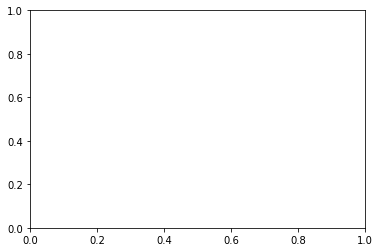

In [24]:
plt.plot(
    np.arange(3),
    N.sum(axis=1)
)
plt.plot(
    np.arange(0.5, 2.5),
    a.M.sum(axis=(1,2))
)

In [ ]:
from cycler import cycler
import matplotlib.pyplot as plt
import itertools

color_list = ['b', 'orange', 'r', 'green', 'k', 'gray']
color_cycle = []
for i in range(len(color_list)):
    color_cycle.append(color_list[i])
    color_cycle.append(color_list[i])

num_regions = 6
plt.rc('axes', prop_cycle=(cycler('color', color_cycle)))

for i in range(num_regions):
    plt.plot(
        np.arange(3),
        N[:, i],
        linestyle='-',
    )
    plt.plot(
        np.arange(0.5, 2.5),
        a.M[:, i].sum(axis=1),
        linestyle=':',
    )